# Tarea 1. Mineria de Datos
### Algoritmo Apriori
##### Leonardo Olivares

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from itertools import chain
import matplotlib.pyplot as plt
import time

In [2]:
#Lectura del archivo .npy
db = np.load('spotify.npy')[()]

In [3]:
#Listas de reproduccion almacendas en diccionario
db = {x: set(db[x]) for x in db}

In [4]:
def initial_count(db):
    '''
    Realiza conteo inicial, de cada cancion en todas las listas.
    '''
    dict_count = defaultdict(int)
    for key in db:
        for value in db[key]:
            dict_count[tuple([value])] += 1
    return dict_count

In [5]:
#Diccionario inicial con conteo de todas las canciones
#Se calcula al comienzo, debido a que se es común para todas las implementaciones del algoritmo
initial = initial_count(db)

In [12]:
def remove_itemsets(dict_count, min_sup_count):
    '''
    Elimina del diccionario los itemsets que no cumplen con el umbral de
    soporte.
    '''
    new_dict = defaultdict(int)
    for (x, y) in dict_count.items():
        if y >= min_sup_count:
            new_dict[x] = y
    return new_dict

In [13]:
def make_combinations(groups, size, initial_order):
    '''
    Realiza las combinaciones de itemsets segun un orden.
    '''
    i = 0
    j = 1
    k = (size - 2)
    new_itemsets = list()
    
    while i < len(groups):

        next_item = False
        while j < len(groups) and not next_item:
            accepted = True
            if size != 2:
                for m in range(k):
                    if groups[i][m] != groups[j][m]:
                        accepted = False
                        next_item = True
            if groups[i][-1] == groups[j][-1]:
                accepted = False

            if accepted:
                new_itemsets.append(tuple(sorted(set(groups[i] + groups[j]), key=lambda x: initial_order.index(x))))

            j += 1

        i += 1
        j = i + 1
        
    return new_itemsets

In [14]:
def fit(db, initial, min_sup_count):
    '''
    Aplica el algoritmo apriori.
    Retorna los itemsets de mayor tamaño, que cumplan con el umbral de soporte.
    '''
    size = 2
    dict_count = remove_itemsets(initial, min_sup_count)
    initial_order = sorted([x[0] for x in dict_count], key=lambda x: dict_count[(x,)], reverse=True)
    itemsets = [(x,) for x in initial_order]
    itemsets = make_combinations(itemsets, size, initial_order)
    
    current_dict = dict()
    dict_count = defaultdict(int)
    while itemsets:
         
        
        for itemset in itemsets:
            
            i = set(itemset)
            count = 0
            for column in db:
                if i.issubset(db[column]):
                    count += 1
            dict_count[itemset] += count
                    
        size+=1
        
        dict_count = remove_itemsets(dict_count, min_sup_count)
        if len(dict_count) > 0:
            current_dict = dict_count
        itemsets = [x for x in itemsets if x in dict_count]
        itemsets = make_combinations(itemsets, size, initial_order)
        
    current_dict = {frozenset(x): current_dict[x] for x in current_dict}
        
    return current_dict

In [37]:
#Entrega los itemsets frecuentes, que cumplan con cierto umbral de soporte.
time_a = time.time()
frequent_itemsets1 = fit(db, initial, 120)
time_b = time.time()
print("Tiempo de Ejecucion", time_b-time_a, "segundos")
print("Itemsets Frecuentes -> min_sup_count: 120")

keys = frequent_itemsets1.keys()
d_1 = {'Itemset': [set(key) for key in keys], 'Support Count': [frequent_itemsets1[key] for key in keys]}
df_1 = pd.DataFrame(data=d_1)
df_1 = df_1[['Itemset', 'Support Count']]
df_1

Tiempo de Ejecucion 340.31984210014343 segundos
Itemsets Frecuentes -> min_sup_count: 120


,Itemset,Support Count
0,"{Closer, Roses}",139
1,"{Closer, One Dance}",121
2,"{Closer, Let Me Love You}",159
3,"{Closer, Don't Let Me Down}",149
4,"{Closer, Cold Water (feat. Justin Bieber & MØ)}",145
5,"{Congratulations, HUMBLE.}",214
6,"{Broccoli (feat. Lil Yachty), HUMBLE.}",130
7,"{Caroline, HUMBLE.}",130
8,"{T-Shirt, HUMBLE.}",124
9,"{Bad and Boujee (feat. Lil Uzi Vert), HUMBLE.}",167


In [38]:
#Entrega los itemsets frecuentes, que cumplan con cierto umbral de soporte.
time_a = time.time()
frequent_itemsets2 = fit(db, initial, 80)
time_b = time.time()
print("Tiempo de Ejecucion", time_b-time_a, "segundos")
print("Itemsets Frecuentes -> min_sup_count: 80")

keys2 = frequent_itemsets2.keys()
d_2 = {'Itemset': [set(key) for key in keys2], 'Support Count': [frequent_itemsets2[key] for key in keys2]}
df_2 = pd.DataFrame(data=d_2)
df_2 = df_2[['Itemset', 'Support Count']]
df_2

Tiempo de Ejecucion 1410.034124135971 segundos
Itemsets Frecuentes -> min_sup_count: 80


,Itemset,Support Count
0,"{Closer, Roses}",139
1,"{Closer, Ride}",118
2,"{Closer, One Dance}",121
3,"{Closer, Broccoli (feat. Lil Yachty)}",107
4,"{Closer, Caroline}",88
5,"{Closer, Let Me Love You}",159
6,"{Closer, Gold}",118
7,"{Closer, No Problem (feat. Lil Wayne & 2 Chainz)}",81
8,"{Closer, I'm the One}",87
9,"{Closer, Sorry}",84


In [39]:
def find_support(db, x):
    '''
    Encuentra el soporte de un itemset en especifico
    '''
    support = 0
    for column in db:
        if x.issubset(db[column]):
            support += 1
    return support

In [40]:
def generate(db, initial, frequent_itemsets, support, confidence):
    '''
    Genera las reglas de asociacion segun distintos criterios, a partir de 
    los itemsets frecuentes.
    '''
    length_db = len(db)
    
    rules = list()
    for itemset in frequent_itemsets:
        itemset = [tuple([x]) for x in itemset]
        size = 2
        length = len(itemset)
        initial_order = sorted([x[0] for x in itemset], key=lambda x: initial[(x,)], reverse=True)
        groups = list()
        while size <= length:
            c = sorted(make_combinations(itemset, size, initial_order), key=lambda x: x[:len(x)-1])
            itemset = c      
            groups.append(c)
            size += 1
        
        for m in range(len(groups)):

            if m == 0:
                for g in groups[m]:
                    r1 = [[g[0]], [g[1]]]
                    r2 = [[g[1]], [g[0]]]
                    if r1 not in rules:
                        rules.append(r1)
                    if r2 not in rules:
                        rules.append(r2)
                        
            else:
                for g in groups[m-1]:
                    
                    for item in initial_order:
                        
                        if item not in g:
                            r1 = [list(g), [item]]
                            r2 = [[item], list(g)]
                            if r1 not in rules:
                                rules.append(r1)
                            if r2 not in rules:
                                rules.append(r2)
                            
        
    info = list()
    for rule in rules:
        x_support = find_support(db, set(rule[0]))/length_db
        y_support = find_support(db, set(rule[1]))/length_db
        
        rule_str = ", ".join(rule[0]) + " -> " + ",".join(rule[1])
    
        support_db = find_support(db, set(x for x in chain(rule[0], rule[1])))/length_db
        confidence = support_db / x_support
        lift = support_db / (x_support * y_support)
        
        info.append((rule_str, support_db, confidence, lift))

    
    
    info = list(filter(lambda x: x[2] >= confidence and x[1] >= support, info))
    info = sorted(info, key=lambda x: (x[2], x[3]), reverse=True)
    return list(zip(*info[:10]))

## Filtro 1.

Support: 0.0012 <br>
Confidence: 0.5

### Explicación

Observando las primeras 2 reglas en la siguiente tabla, se puede concluir lo siguiente:

    Regla #0: El soporte de 0.0190 sugiere que, de 10000 listas de reproduccion, esta combinación de elementos se encontró en 190 de ellas, cumpliendo con el umbral inicialmente establecido (120). El nivel de confianza explica que existe una probabilidad alta (82.25%) de que la regla se cumpla, es decir, si una lista de reproducción contiene las canciones XO TOUR Llif3 y Mask Off, es muy probable que tambien contenga la canción Humble. Por último, el valor de lift expresa tanto el soporte como la confianza de la regla, en un cociente. Este valor, al ser mayor a 1, valida la regla.
    
    Regla #1: Siguiendo la misma lógica que en la regla anterior, esta regla muestra un soporte menor, lo que significa que es menos probable conseguir esta combinación en las listas de reproducción, pero sigue cumpliendo con el umbral establecido. Nuevamente, el valor de la confianza es algo menor, lo que sugiere que la regla anterior es más precisa. Por último, el valor del lift, al ser mayor a 1, nos indica que la regla sigue siendo valida bajo nuestras condiciones iniciales.

In [41]:
info1 = generate(db, initial, frequent_itemsets1, 0.0012,0.5)

d1 = {'Rule': info1[0], 'Support': info1[1], 'Confidence': info1[2], 'Lift': info1[3]}
df1 = pd.DataFrame(data=d1)
df1 = df1[['Rule', 'Support', 'Confidence', 'Lift']]
df1.style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})

## Filtro 2.

Support: 0.004 <br>
Confidence: 0.7

#### Explicación

Similar al filtro anterior, tomaremos dos reglas para analizar.

    Regla #0: Esta regla tiene un soporte mucho mas bajo a las reglas del filtro anterior. En este caso, no cumpliria con el umbral del filtro anterior, pero si para el umbral actual. Por otro lado, el nivel de confianza (94.18%) demuestra ser mayor que todos los observados anteriormente, lo que significa que es más confiable y precisa. En cuanto al lift, sigue siendo un valor mayor a 1, por lo que la regla tiene validez.
    
    Regla #7: Con un soporte de 0.0082, es la regla con menor frecuencia entre las que se encuentran en el top, por lo que la probabilidad de conseguir esta combinación en las listas de reproducción no es la más alta, pero cumple con el umbral establecido. En cuanto al lift y la confianza, tiene valores altos y que reafirman que la regla de asocicion es valida según los condiciones iniciales.

In [42]:
info2 = generate(db, initial, frequent_itemsets2, 0.004,0.7)
d2 = {'Rule': info2[0], 'Support': info2[1], 'Confidence': info2[2], 'Lift': info2[3]}
df2 = pd.DataFrame(data=d2)
df2 = df2[['Rule', 'Support', 'Confidence', 'Lift']]
df2.style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})

In [43]:
def make_graph(info):
    '''
    Genera una representacion grafica de las reglas de asociacion.
    '''
    plt.figure(figsize=(15,10))
    for r in range(len(info[0])):
        plt.scatter(info[1][r], info[2][r], s=(info[3][r]+5)*10)


    plt.legend(info[0], loc='upper right', ncol=1)
    plt.title("Reglas de Asociacion")
    plt.xlabel("Support")
    plt.ylabel("Confidence")

    plt.show()


## Visualización - Filtro 1
Para la visualización, se filtraron las 10 mejores reglas, según el nivel de confianza.<br>
Cada punto en el gráfico simboliza una regla de asociación. El eje x es el soporte de la regla, mientras
que el eje 'y' es la confianza de dicha regla.<br>
Además el tamaño de cada punto simboliza el valor del 'lift', sin embargo, todos los valores son bastante similares
por lo que no se observa una diferencia significativa.

Como se observó en las tablas, la regla '0' (azul) es la más precisa, mientras que las combinaciones más frecuentes son las que forman las reglas '5' (castaño) y '9' (celeste). En este caso, la regla '0' es la de mayor calidad, debido a que sobrepasa el umbral de soporte y mantiene un nivel de confianza alto.

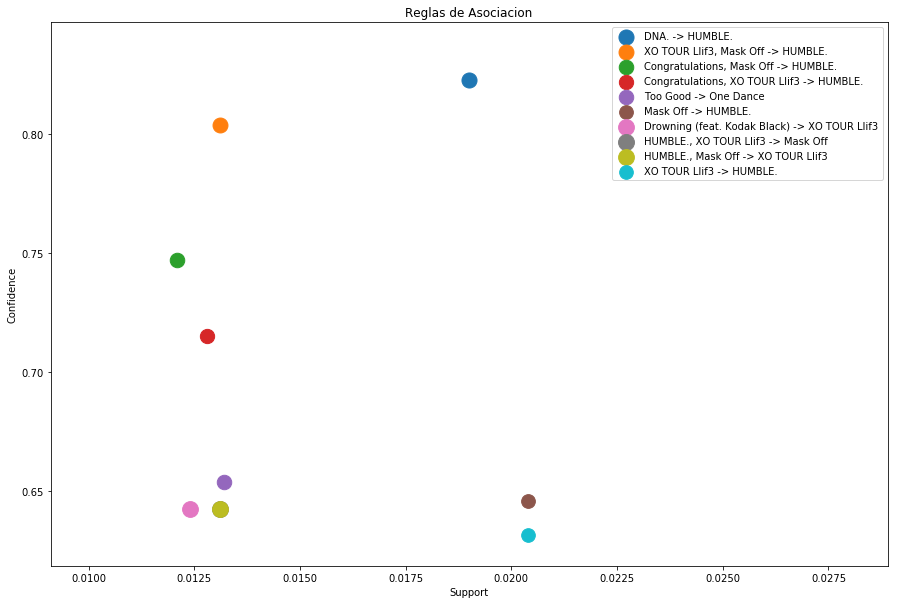

In [44]:
make_graph(info1)

## Visualización - Filtro 2
Para la visualización, se filtraron las 10 mejores reglas, según el nivel de confianza.<br>
Cada punto en el gráfico simboliza una regla de asociación. El eje x es el soporte de la regla, mientras
que el eje 'y' es la confianza de dicha regla.<br>
Además el tamaño de cada punto simboliza el valor del 'lift', sin embargo, todos los valores son bastante similares
por lo que no se observa una diferencia significativa.

Como se observó en la tabla anterior, la regla '0' (azul), tiene el nivel de confianza más alto y muy cercano a 1, lo cual sugiere una alta precisión a que la regla se cumpla. Con respecto al umbral de soporte seleccionado, la regla '8' (verde claro), es la que consiste de elementos que se repite con mayor frecuencia en las listas de reproducción.

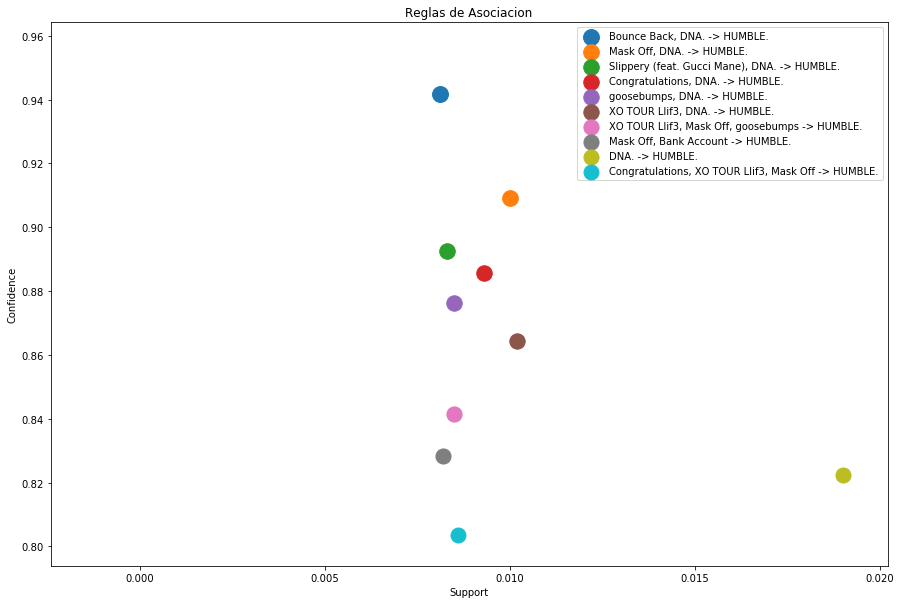

In [45]:
make_graph(info2)